## Data Pre-Processing

In [1]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/car/
  inflating: dataset/car/car1.jpg    
  inflating: dataset/car/car10.jpg   
  inflating: dataset/car/car11.jpg   
  inflating: dataset/car/car12.jpg   
  inflating: dataset/car/car13.jpg   
  inflating: dataset/car/car14.jpg   
  inflating: dataset/car/car15.jpg   
  inflating: dataset/car/car16.jpg   
  inflating: dataset/car/car17.jpg   
  inflating: dataset/car/car18.jpg   
  inflating: dataset/car/car19.jpg   
  inflating: dataset/car/car2.jpg    
  inflating: dataset/car/car20.jpg   
  inflating: dataset/car/car21.jpg   
  inflating: dataset/car/car22.jpg   
  inflating: dataset/car/car23.jpg   
  inflating: dataset/car/car24.jpg   
  inflating: dataset/car/car25.jpg   
  inflating: dataset/car/car26.jpg   
  inflating: dataset/car/car27.jpg   
  inflating: dataset/car/car28.jpg   
  inflating: dataset/car/car29.jpg   
  inflating: dataset/car/car3.jpg    
  inflating: dataset/car/car30.jpg   
  inflating: datas

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os

dataset_path = os.listdir('dataset')
print(dataset_path)

print("Types of classes labels found: ", len(dataset_path))

['pencil', 'car', 'smartphone']
Types of classes labels found:  3


In [3]:
class_labels = []

for item in dataset_path:
  all_classes = os.listdir('dataset' + '/' + item)

  # Add into the list
  for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' + item) + '/' + room))

In [4]:
print(class_labels[:5])

[('pencil', 'dataset_path/pencil/pencil11.jpg'), ('pencil', 'dataset_path/pencil/pencil16.jpg'), ('pencil', 'dataset_path/pencil/pencil3.jpg'), ('pencil', 'dataset_path/pencil/pencil5.jpg'), ('pencil', 'dataset_path/pencil/pencil4.jpg')]


In [5]:
# Build dataframe
df = pd.DataFrame(data = class_labels, columns = ['labels', 'image'])
print(df.head())
print(df.tail())

   labels                             image
0  pencil  dataset_path/pencil/pencil11.jpg
1  pencil  dataset_path/pencil/pencil16.jpg
2  pencil   dataset_path/pencil/pencil3.jpg
3  pencil   dataset_path/pencil/pencil5.jpg
4  pencil   dataset_path/pencil/pencil4.jpg
        labels                                     image
85  smartphone  dataset_path/smartphone/smartphone14.jpg
86  smartphone  dataset_path/smartphone/smartphone10.jpg
87  smartphone   dataset_path/smartphone/smartphone4.jpg
88  smartphone   dataset_path/smartphone/smartphone1.jpg
89  smartphone  dataset_path/smartphone/smartphone24.jpg


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  90 non-null     object
 1   image   90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [7]:
# Check how many samples for each category present
print("Total number of images: ", len(df))

label_count = df['labels'].value_counts()
print(label_count)

Total number of images:  90
pencil        30
car           30
smartphone    30
Name: labels, dtype: int64


In [8]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
  data_path = path + str(i)
  filenames = [i for i in os.listdir(data_path)]

  for f in filenames:
    img = cv2.imread(data_path + '/' + f)
    img = cv2.resize(img, (im_size, im_size))
    images.append(img)
    labels.append(i)

In [9]:
# Model take input (224,224,3) and the input with range [0, 255]

images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(90, 224, 224, 3)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = df['labels'].values
print(y)

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

['pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil'
 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil'
 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil'
 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'pencil' 'car' 'car' 'car'
 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car'
 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car'
 'car' 'car' 'car' 'smartphone' 'smartphone' 'smartphone' 'smartphone'
 'smartphone' 'smartphone' 'smartphone' 'smartphone' 'smartphone'
 'smartphone' 'smartphone' 'smartphone' 'smartphone' 'smartphone'
 'smartphone' 'smartphone' 'smartphone' 'smartphone' 'smartphone'
 'smartphone' 'smartphone' 'smartphone' 'smartphone' 'smartphone'
 'smartphone' 'smartphone' 'smartphone' 'smartphone' 'smartphone'
 'smartphone']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 

In [11]:
y = y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) # Into array() -> .toarray()
print(Y[:5])
print(Y[35:])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=21)
train_X, test_X, train_y, test_y = train_test_split(images, Y, test_size=0.1, random_state=21)

# Inspect the shape of the data
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(81, 224, 224, 3)
(9, 224, 224, 3)
(81, 3)
(9, 3)


## Efficient Implementation

In [27]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [32]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
hist = model.fit(train_X, train_y, epochs=30, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
3/3 - 11s - loss: 3.4159 - accuracy: 0.3333 - 11s/epoch - 4s/step
Epoch 2/30
3/3 - 1s - loss: 5.0850 - accuracy: 0.4815 - 1s/epoch - 433ms/step
Epoch 3/30
3/3 - 1s - loss: 3.3323 - accuracy: 0.4691 - 1s/epoch - 430ms/step
Epoch 4/30
3/3 - 1s - loss: 1.7872 - accuracy: 0.5432 - 1s/epoch - 431ms/step
Epoch 5/30
3/3 - 1s - loss: 2.4183 - accuracy: 0.5802 - 1s/epoch - 432ms/step
Epoch 6/30
3/3 - 1s - loss: 2.7139 - accuracy: 0.65

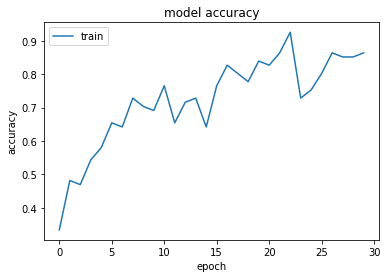

In [33]:
def plot_hist(hist):
  plt.plot(hist.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel("epoch")
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot_hist(hist)

In [34]:
preds = model.evaluate(test_X, test_y)
print('loss: ' + str(preds[0]))
print("Test Accuracy: " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 2.1882 - accuracy: 0.4444
loss: 2.1881816387176514
Test Accuracy: 0.4444444477558136


## Testing data into new data

In [17]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imread, imshow

Image shape:  (1, 224, 224, 3)


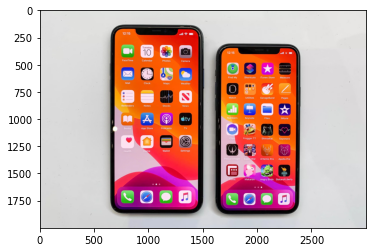

In [18]:
img_path = 'apple.jpg'

# img = image.load_img(img_path, target_size=(224, 224))
# x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print("Image shape: ", x.shape)

my_img = imread(img_path)
imshow(my_img)

In [19]:
preds = model.predict(x)
preds.round(3)

array([[0.052, 0.077, 0.872]], dtype=float32)

In [20]:
# CUDA and CUDNN is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_performance = model.fit(train_X, train_y, epochs=30, verbose=2)
  cpu_performance

Epoch 1/30
3/3 - 23s - loss: 0.1938 - accuracy: 0.9012 - 23s/epoch - 8s/step
Epoch 2/30
3/3 - 20s - loss: 0.8700 - accuracy: 0.9753 - 20s/epoch - 7s/step
Epoch 3/30
3/3 - 20s - loss: 0.3896 - accuracy: 0.9259 - 20s/epoch - 7s/step
Epoch 4/30
3/3 - 20s - loss: 0.6172 - accuracy: 0.9506 - 20s/epoch - 7s/step
Epoch 5/30
3/3 - 20s - loss: 0.5930 - accuracy: 0.9506 - 20s/epoch - 7s/step
Epoch 6/30
3/3 - 20s - loss: 0.9649 - accuracy: 0.9506 - 20s/epoch - 7s/step
Epoch 7/30
3/3 - 20s - loss: 1.0967 - accuracy: 0.9259 - 20s/epoch - 7s/step
Epoch 8/30
3/3 - 20s - loss: 0.6208 - accuracy: 0.9383 - 20s/epoch - 7s/step
Epoch 9/30
3/3 - 20s - loss: 1.0899 - accuracy: 0.9136 - 20s/epoch - 7s/step
Epoch 10/30
3/3 - 20s - loss: 1.5734 - accuracy: 0.8395 - 20s/epoch - 7s/step
Epoch 11/30
3/3 - 20s - loss: 1.2376 - accuracy: 0.9012 - 20s/epoch - 7s/step
Epoch 12/30
3/3 - 20s - loss: 0.2940 - accuracy: 0.9506 - 20s/epoch - 7s/step
Epoch 13/30
3/3 - 20s - loss: 0.4682 - accuracy: 0.9136 - 20s/epoch - 7s/

In [22]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_performance = model.fit(train_X, train_y, epochs=30, verbose=2)
  gpu_performance

Epoch 1/30
3/3 - 1s - loss: 0.3041 - accuracy: 0.9383 - 1s/epoch - 486ms/step
Epoch 2/30
3/3 - 1s - loss: 0.5833 - accuracy: 0.8519 - 1s/epoch - 436ms/step
Epoch 3/30
3/3 - 1s - loss: 1.3821 - accuracy: 0.8642 - 1s/epoch - 433ms/step
Epoch 4/30
3/3 - 1s - loss: 0.6316 - accuracy: 0.8519 - 1s/epoch - 437ms/step
Epoch 5/30
3/3 - 1s - loss: 1.7180 - accuracy: 0.9259 - 1s/epoch - 429ms/step
Epoch 6/30
3/3 - 1s - loss: 0.6729 - accuracy: 0.8395 - 1s/epoch - 435ms/step
Epoch 7/30
3/3 - 1s - loss: 0.3783 - accuracy: 0.9012 - 1s/epoch - 432ms/step
Epoch 8/30
3/3 - 1s - loss: 0.1780 - accuracy: 0.9259 - 1s/epoch - 431ms/step
Epoch 9/30
3/3 - 1s - loss: 0.6284 - accuracy: 0.9630 - 1s/epoch - 435ms/step
Epoch 10/30
3/3 - 1s - loss: 0.1541 - accuracy: 0.9383 - 1s/epoch - 429ms/step
Epoch 11/30
3/3 - 1s - loss: 0.1599 - accuracy: 0.9383 - 1s/epoch - 436ms/step
Epoch 12/30
3/3 - 1s - loss: 0.1191 - accuracy: 0.9630 - 1s/epoch - 440ms/step
Epoch 13/30
3/3 - 1s - loss: 0.0474 - accuracy: 1.0000 - 1s/e